<a href="https://colab.research.google.com/github/satyam0402/python-ml/blob/main/Linear_Regression_based_Medical_Insurance_Cost_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM STATEMENT : Ensurance company wants to hire you to develop a machine learning based prediction model that can predict the medical insurance of a person.

STEP 1 : Understanding the Work flow

1. Insurance Cost Data
2. Data Analysis of the data set.
3. Data Pre processing
4. Train Test Split
5. Feeding the processed data to Linear Regression model to train it.
6. Using the trained Linear Regression Model to predict the insurance cost.

STEP 2 : Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


STEP 3 : Data Collection and Analysis

In [2]:
# Loading the data from dataset to Pandas dataframe
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [3]:
# Analysing the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Shape of dataframe
insurance_dataset.shape

(1338, 7)

In [6]:
# Info and description of dataframe
insurance_dataset.info() # there are no null values here so we dont have to do any data cleaning step
insurance_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


NOTE : There are catogerical features present in the dataframe and we know that the ml model can not understand the catogerical features. So befre feeding the dataframe to the model we have to convert these catogerical features to numerical valued features.

Catogerical features : Sex, Smoker, Region

Target column : Charges

In [7]:
# Check for null values :
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [9]:
# Statistical Analysis
insurance_dataset.describe() # gives statistical mesaure of only numerical features

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


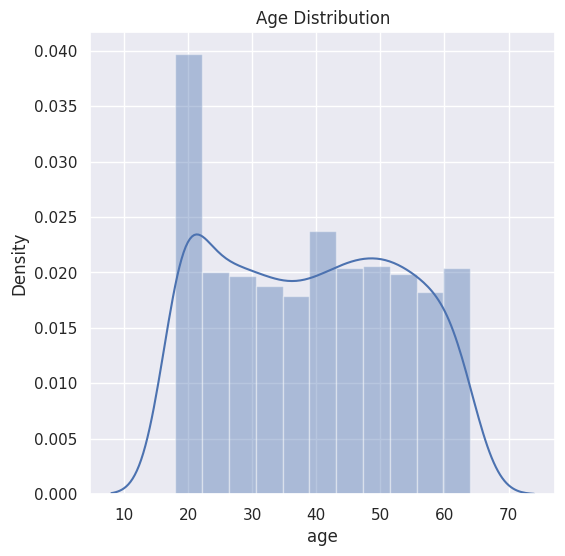

In [15]:
# Distribution of age
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

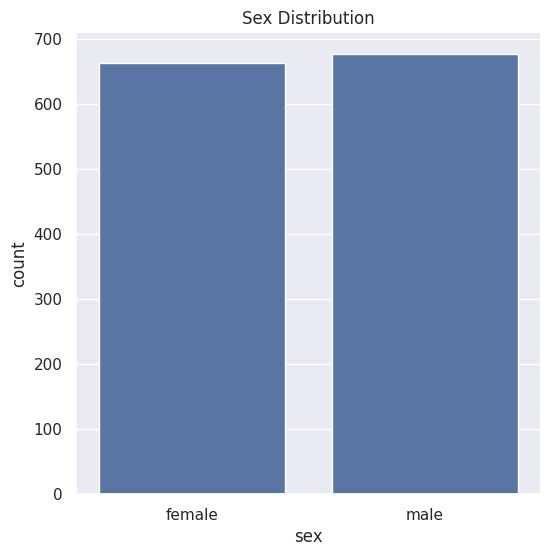

In [18]:
# Count plot for gender ( Cant generate distribution plot as it is catogerical feature)
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex', data = insurance_dataset)
plt.title('Sex Distribution')
plt.show()

/tmp/ipython-input-19-407029707.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


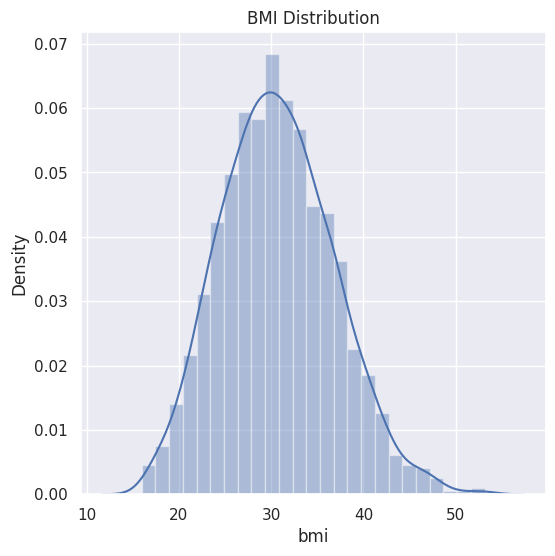

In [19]:
# BMI distribution
sns.set()
plt.figure(figsize =(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()



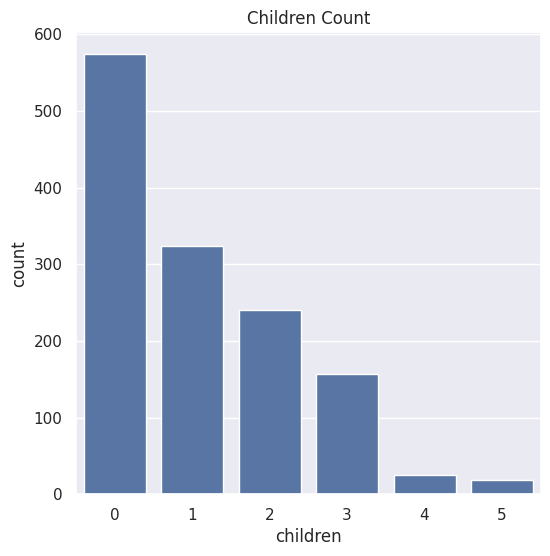

In [21]:
# Count plot for childrin
plt.figure(figsize=(6,6))
sns.countplot(x ='children', data = insurance_dataset)
plt.title('Children Count')
plt.show()

In [24]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


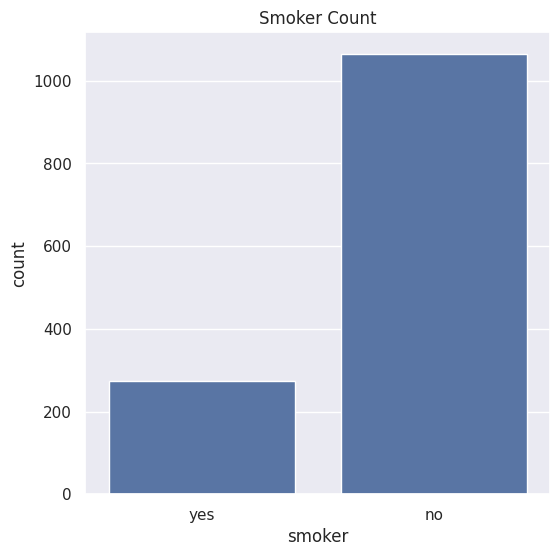

In [25]:
# Count plot for smoker
plt.figure(figsize=(6,6))
sns.countplot(x ='smoker', data = insurance_dataset)
plt.title('Smoker Count')
plt.show()

In [26]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


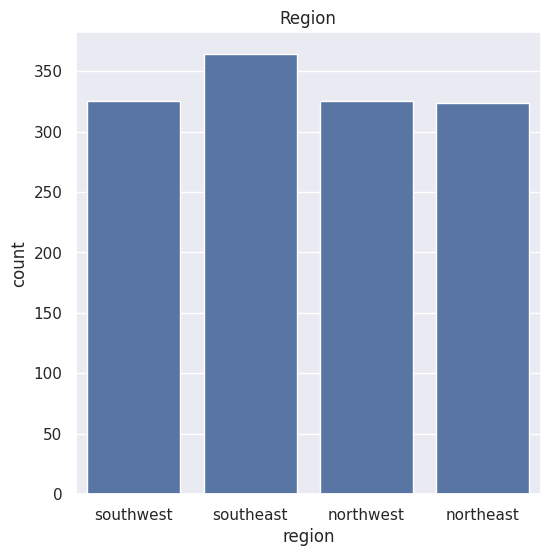

In [27]:
# Count plot for region
plt.figure(figsize=(6,6))
sns.countplot(x ='region', data = insurance_dataset)
plt.title('Region')
plt.show()

In [28]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


/tmp/ipython-input-30-3385566780.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


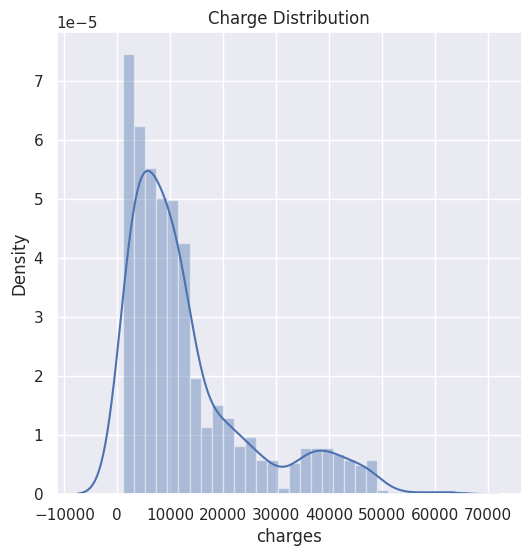

In [30]:
# Count plot for charges
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charge Distribution')
plt.show()

In [31]:
# Encoding the catogerical features
#. 1. Encoding the sex coloumn
insurence_dataset = insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace = True)


/tmp/ipython-input-31-439049877.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurence_dataset = insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace = True)


In [32]:
# 2. Encoding the smoker feature
insurence_dataset = insurance_dataset.replace({'smoker' : {'yes': 0 ,'no' : 1}}, inplace = True)

/tmp/ipython-input-32-3601036126.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurence_dataset = insurance_dataset.replace({'smoker' : {'yes': 0 ,'no' : 1}}, inplace = True)


In [36]:
# Encoding the region feature
insurance_dataset = insurance_dataset.replace({'region':{'southeast':0, 'southwest': 1, 'northeast': 2, 'northwest':3}}, inplace = True)

In [34]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [35]:
# Splitting the features and target
X = insurance_dataset.drop(columns = 'charges', axis = 1)
Y = insurance_dataset['charges']

In [39]:
display(X)

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [40]:
display(Y)

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [51]:
# Splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [52]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


STEP 4 : Model Training

In [54]:
# Loading the Linear Regression Model
lin_reg_model = LinearRegression()

In [55]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [56]:
# Prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [58]:
# R squared value
r2_with_train = metrics.r2_score(Y_train, training_data_prediction)


In [59]:
print('R squared value : ', r2_with_train)

R squared value :  0.751505643411174


In [61]:
# Prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [62]:
# R Squared value
r2_with_test = metrics.r2_score(Y_test, test_data_prediction)

In [63]:
print('R squared value : ', r2_with_test)

R squared value :  0.7447273869684076


STEP 5 : Prediction System

In [67]:
input_data = (61,0,29.07,0,1,3)



In [68]:
# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lin_reg_model.predict(input_data_reshaped)
print(prediction)

[13013.83677479]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
